In [280]:
%run spot_functions.ipynb
%run gl_functions.ipynb

In [3]:
# sdk, robot, id_client, \
# robot_state_client, command_client, \
# image_client, graph_nav_client, \
# world_object_client, manipulation_api_client = initRobot('192.168.50.3')
# timeout_sec = 5

In [4]:
# lease_client, lease, lease_keep_alive = getLease(robot)

In [5]:
# Initialize Groundlight API

GROUNDLIGHT_API_TOKEN = 'api_2Au8NPiTMbSLQ73Vjr2eMhX2qUh_pt4EEKhtDNgnjN3dUAr89YANDcYsmBkJZV'
gl = Groundlight(api_token=GROUNDLIGHT_API_TOKEN)
detectors = gl.list_detectors()
det = detectors.results[1]
print(det)

id='det_2AuDZFz06xbytjWrTL0dUvsjOz7' type=<DetectorTypeEnum.detector: 'detector'> created_at=datetime.datetime(2022, 6, 21, 15, 30, 29, 961429, tzinfo=tzoffset(None, -25200)) name='newRubiksCube' query="Is entire Rubik's cube contained within image?" group_name='__DEFAULT' confidence_threshold=0.5


In [312]:
getBattInfo()

Battery at: 0.0 %. Robot has 55 seconds left


(0.0, 55)

In [231]:
success = powerOn(robot)

True


In [179]:
bdcrc.blocking_selfright(command_client, timeout_sec = timeout_sec)

In [303]:
moveRobotRelative(command_client, 0, 0, np.pi/20)

In [221]:
moveToAndLookAt(moveTo,[1.5,0,-0.5], True)

In [309]:
def randomGazeDown():    
    armOrigin = np.array([0.35,0,0.1])# NOT EXACT, USED FOR ROUGHLY CALCULATING POINTS OF MAXIMUM REACH
    armLength = 0.7

    armXPos = np.random.uniform(0, 0.4)
    armZPos = np.random.uniform(0.15, (armLength**2 - armXPos**2)**0.5)
    maxYPos = (armLength**2 - armXPos**2 - armZPos**2)**0.5 - 0.1
    armYPos = np.random.uniform(-maxYPos, maxYPos)

    moveTo = np.array([armXPos, armYPos, armZPos]) + armOrigin

    lookAt = [np.random.uniform(1, 1.5), 
              np.random.uniform(-0.4,0.4), 
              np.random.uniform(-0.5,-1.5)]
    return moveTo, lookAt

In [310]:
def randomCubeDrop(command_client):
    randomLookDir = [((np.random.rand() * 2) - 1) * 2, 
                 (((np.random.rand()) * 2) - 1) * 3, 
                 np.random.rand() * (-2)  ]

    moveToAndLookAt([0.8,0,-0.35],randomLookDir, True)
    
    time.sleep(0.5)

    cmd = RobotCommandBuilder.claw_gripper_open_fraction_command(1.0)
    cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+timeout_sec)

    time.sleep(0.5)

    cmd = RobotCommandBuilder.arm_stow_command()
    cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+5)

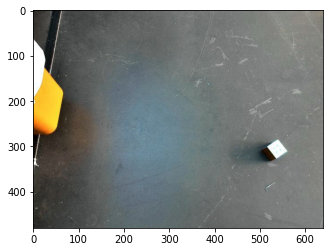

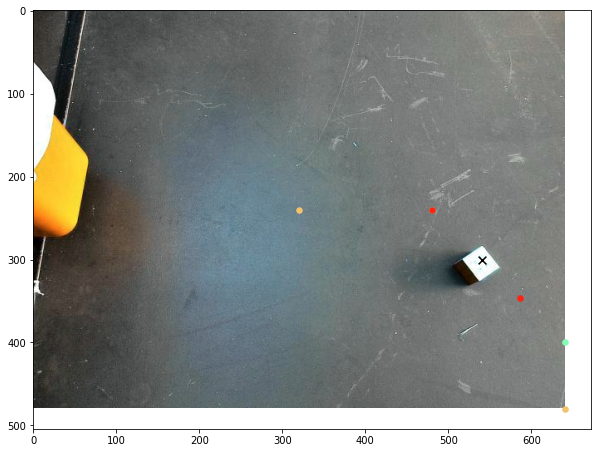

GRASP TOOK TOO LONG, STOPPING NOW
FAILED TO GRAB CUBE
header {
  request_header {
    request_timestamp {
      seconds: 1656030039
      nanos: 848728832
    }
    client_name: "ASTROspotJetson:8746"
  }
  request_received_timestamp {
    seconds: 1656030147
    nanos: 456176059
  }
  response_timestamp {
    seconds: 1656030147
    nanos: 456198253
  }
  error {
    code: CODE_OK
  }
  request {
    type_url: "type.googleapis.com/bosdyn.api.ManipulationApiFeedbackRequest"
    value: "\n$\n\014\010\327\206\324\225\006\020\200\246\332\224\003\022\024ASTROspotJetson:8746\020\264N"
  }
}
current_state: MANIP_STATE_MOVING_TO_GRASP
transforms_snapshot_manipulation_data {
  child_to_parent_edge_map {
    key: "gripper_nearest_object"
    value {
      parent_frame_name: "vision"
      parent_tform_child {
        position {
          x: -0.20095320551885423
          y: -0.09652255010170305
          z: -0.17859777791864836
        }
        rotation {
          w: 1.0
        }
      }
   

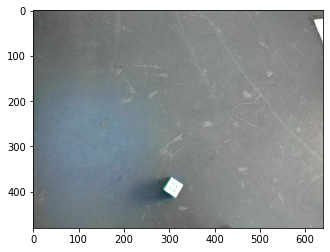

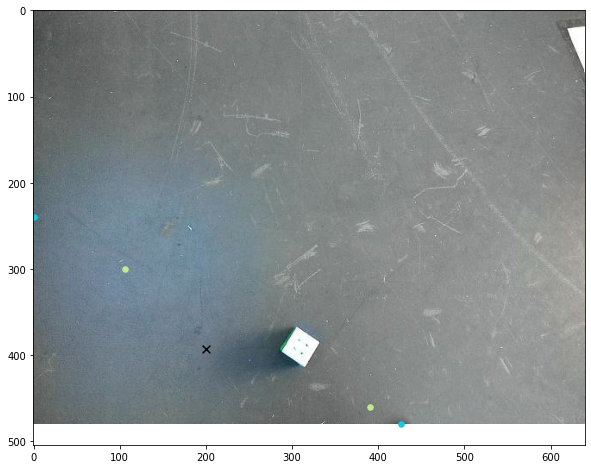

FAILED TO GRAB CUBE
header {
  request_header {
    request_timestamp {
      seconds: 1656030067
      nanos: 248609536
    }
    client_name: "ASTROspotJetson:8746"
  }
  request_received_timestamp {
    seconds: 1656030174
    nanos: 855313158
  }
  response_timestamp {
    seconds: 1656030174
    nanos: 855324222
  }
  error {
    code: CODE_OK
  }
  request {
    type_url: "type.googleapis.com/bosdyn.api.ManipulationApiFeedbackRequest"
    value: "\n#\n\013\010\363\206\324\225\006\020\200\366\305v\022\024ASTROspotJetson:8746\020\265N"
  }
}
current_state: MANIP_STATE_GRASP_PLANNING_NO_SOLUTION
transforms_snapshot_manipulation_data {
  child_to_parent_edge_map {
    key: "gripper_nearest_object"
    value {
      parent_frame_name: "vision"
      parent_tform_child {
        position {
          x: -0.1728029157811741
          y: -0.324706807602565
          z: -0.0664300750745982
        }
        rotation {
          w: 1.0
        }
      }
    }
  }
  child_to_parent_edge_map 

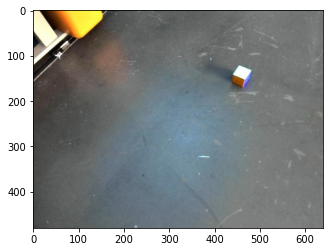

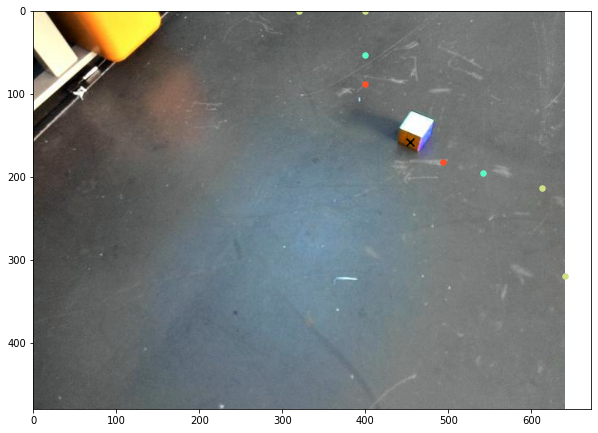

KeyboardInterrupt: 

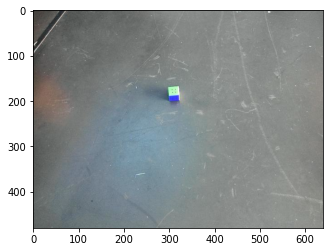

In [311]:
for i in range(6):
    bdcrc.blocking_stand(command_client, timeout_sec = timeout_sec)

    moveTo, lookAt = randomGazeDown()
    
    moveToAndLookAt(moveTo,lookAt, True)
    cmd = RobotCommandBuilder.claw_gripper_open_fraction_command(1.0)
    cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+timeout_sec)
    time.sleep(0.5)

    graph_response = graph_nav_client.clear_graph()

    imgName = 'GLIMG/handColorImage.jpg'
    image_response = capImage(image_client, imgName)
    img = cv2.imread(imgName)
    plt.figure(figsize = (6,4))
    plt.imshow(img)
    
    time.sleep(0.1)
    
    cmd = RobotCommandBuilder.arm_stow_command()
    cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+5)
    bdcrc.block_until_arm_arrives(command_client, cmd_id, timeout_sec = time.time() + 3.0)
    
    time.sleep(1.5)

    tree = sweepLocalize(det, img)

    if tree is None:
        print('CUBE NOT FOUND')
        continue

    plotTreeOnImage(tree, img)
    plt.show()

    pxLoc = assemblePxTree(tree)
    pick_vec = geometry_pb2.Vec2(x=pxLoc[0], y=pxLoc[1])

    grasp = manipulation_api_pb2.PickObjectInImage(
        pixel_xy=pick_vec, transforms_snapshot_for_camera=image_response.shot.transforms_snapshot,
        frame_name_image_sensor=image_response.shot.frame_name_image_sensor,
        camera_model=image_response.source.pinhole)

    grasp_request = manipulation_api_pb2.ManipulationApiRequest(pick_object_in_image=grasp)
    
    response, success = makeGrasp(grasp_request, graph_nav_client)
        
    cmd = RobotCommandBuilder.arm_stow_command()
    cmd_id = command_client.robot_command(cmd, end_time_secs = time.time()+5)
    bdcrc.block_until_arm_arrives(command_client, cmd_id, timeout_sec = time.time() + 3.0)
    
    time.sleep(2)
    
    if not success:
        print('FAILED TO GRAB CUBE')
        print(response)
        continue
    
    curState = robot_state_client.get_robot_state()
    wristPosRads = np.abs(curState.kinematic_state.joint_states[-1].position.value)
    
    if wristPosRads < np.pi/36:
        print('GRIPPER IS CLOSED. FAILED TO GRAB CUBE')
        continue
    
    randomCubeDrop(command_client)
    
    moveRobotRelative(command_client, -0.5, 0, 0)
    